In [ ]:
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import missingno as msno
import geopandas as gpd

import descartes
import warnings         # Utilizamos esto para evitar warnings
warnings.filterwarnings("ignore")
import shapely.wkt

# Gasolina en Colombia

In [ ]:
archivos = [
    "/content/precios (1).csv",
    "/content/precios (2).csv",
    "/content/precios (3).csv",
    "/content/precios (4).csv",
    "/content/precios (5).csv",
    "/content/precios (6).csv",
    "/content/precios (7).csv",
    "/content/precios (8).csv",
    "/content/precios (9).csv",
    "/content/precios (10).csv",
    "/content/precios (11).csv",
    "/content/precios (12).csv",
    "/content/precios (13).csv",
    "/content/precios (14).csv",
    "/content/precios (15).csv",
    "/content/precios (16).csv",
    "/content/precios (17).csv",
    "/content/precios (18).csv",
    "/content/precios (19).csv",
    "/content/precios (20).csv",
    "/content/precios (21).csv",
    "/content/precios (22).csv",
    "/content/precios (23).csv",
    "/content/precios (24).csv",
    "/content/precios (25).csv",
    "/content/precios (26).csv"
]

def read_as_character(file):
    return pd.read_csv(file, dtype=str)

# Leer y combinar los archivos
dfgas = pd.concat([read_as_character(file) for file in archivos])

dfgas['VALOR PRECIO'] = pd.to_numeric(dfgas['VALOR PRECIO'], errors='coerce')


In [ ]:
dfgas

,BANDERA,NOMBRE COMERCIAL,PRODUCTO,FECHA REGISTRO,DEPARTAMENTO,MUNICIPIO,VALOR PRECIO
0,TERPEL,ESTACION DE SERVICIO AVENIDA SEXTA,GASOLINA MOTOR,01-Jan-2018,AMAZONAS,LETICIA,9030.0
1,TERPEL,ESTACION DE SERVICIO AVENIDA SEXTA,DIESEL,01-Jan-2018,AMAZONAS,LETICIA,8250.0
2,BIOMAX,EDS ESSO BELLO MADERA,EXTRA,01-Jan-2018,ANTIOQUIA,BELLO,11390.0
3,BIOMAX,EDS ESSO BELLO MADERA,DIESEL,01-Jan-2018,ANTIOQUIA,BELLO,8220.0
4,BIOMAX,EDS ESSO BELLO MADERA,GASOLINA MOTOR,01-Jan-2018,ANTIOQUIA,BELLO,8320.0
...,...,...,...,...,...,...,...
25394,TERPEL,ESTACION DE SERVICIO EL TERMINAL DE TRANSPORTES,DIESEL,30-Jun-2024,NARIÑO,PASTO,9993.0
25395,TERPEL,ESTACION DE SERVICIO EL TERMINAL DE TRANSPORTES,EXTRA,30-Jun-2024,NARIÑO,PASTO,19999.0
25396,TERPEL,ESTACION DE SERVICIO EL TERMINAL DE TRANSPORTES,GASOLINA MOTOR,30-Jun-2024,NARIÑO,PASTO,16453.0
25397,PRIMAX,ESTACION DE SERVICIO EL PLACER,DIESEL,30-Jun-2024,NARIÑO,YACUANQUER,9810.0


In [ ]:
# Mostrar los nombres de las columnas
print("Column names:", dfgas.columns.tolist())

# Mostrar las dimensiones del DataFrame
print("Dimensions:", dfgas.shape)

# Mostrar la estructura del DataFrame
print("DataFrame info:")
dfgas.info()

Column names: ['BANDERA', 'NOMBRE COMERCIAL', 'PRODUCTO', 'FECHA REGISTRO', 'DEPARTAMENTO', 'MUNICIPIO', 'VALOR PRECIO']
Dimensions: (1223000, 7)
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 1223000 entries, 0 to 25398
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   BANDERA           1223000 non-null  object 
 1   NOMBRE COMERCIAL  1222823 non-null  object 
 2   PRODUCTO          1223000 non-null  object 
 3   FECHA REGISTRO    1223000 non-null  object 
 4   DEPARTAMENTO      1223000 non-null  object 
 5   MUNICIPIO         1223000 non-null  object 
 6   VALOR PRECIO      1223000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 74.6+ MB


In [ ]:
summary = dfgas.describe(include='all')
print(summary)

        BANDERA           NOMBRE COMERCIAL PRODUCTO FECHA REGISTRO  \
count   1223000                    1222823  1223000        1223000   
unique       24                       6041        3           2261   
top      TERPEL  ESTACION DE SERVICIO OTUN   DIESEL    01-Jul-2022   
freq     451698                       2205   537933           8413   
mean        NaN                        NaN      NaN            NaN   
std         NaN                        NaN      NaN            NaN   
min         NaN                        NaN      NaN            NaN   
25%         NaN                        NaN      NaN            NaN   
50%         NaN                        NaN      NaN            NaN   
75%         NaN                        NaN      NaN            NaN   
max         NaN                        NaN      NaN            NaN   

       DEPARTAMENTO     MUNICIPIO  VALOR PRECIO  
count       1223000       1223000  1.223000e+06  
unique           34           919           NaN  
top      

## Analisis de la base de datos:

El data frame contiene información sobre al menos las siguientes variables:

- **BANDERA(Caracter)**: Bandera del lugar de la toma de datos.
- **NOMBRE.COMERCIAL(Caracter)**: El nombre comercial de una estación de servicio o distribuidor.
- **PRODUCTO(Caracter)**: Tipo de producto.
- **FECHA.REGISTRO(Caracter)**: Fecha en la que se registró la información.
- **DEPARTAMENTO(Caracter)**: Departamento geográfico.
- **MUNICIPIO(Caracter)**: Municipio.
- **VALOR.PRECIO(Numerico)**: Precio del producto.

In [ ]:
# Obtener frecuencia de valores únicos en las columnas
bandera_counts = dfgas['BANDERA'].value_counts()
producto_counts = dfgas['PRODUCTO'].value_counts()
departamento_counts = dfgas['DEPARTAMENTO'].value_counts()


## Mostrar las frecuencias

In [ ]:
print("Frecuencia de BANDERA:")
print(bandera_counts)

Frecuencia de BANDERA:
BANDERA
TERPEL                 451698
PRIMAX                 189431
BIOMAX                 157832
TEXACO                 123957
PETROMIL                71066
ZEUSS                   35338
AYATAWACOOP             32254
PETROBRAS               25693
COOMULPINORT            18939
ESSO                    16664
ECOS                    15999
PUMA                    14295
DISCOM                  12617
DISCOWACOOP             11962
PETRODECOL              10126
PETRDECOL                9396
PLUS MAS                 6756
OCTANO                   5777
P Y B                    3907
ZAPATA Y VELASQUEZ       3725
BRIO                     3295
SAVE                     1308
PROXXON                   788
-                         177
Name: count, dtype: int64


In [ ]:
print("\nFrecuencia de PRODUCTO:")
print(producto_counts)


Frecuencia de PRODUCTO:
PRODUCTO
DIESEL            537933
GASOLINA MOTOR    520374
EXTRA             164693
Name: count, dtype: int64


In [ ]:
print("\nFrecuencia de DEPARTAMENTO:")
print(departamento_counts)


Frecuencia de DEPARTAMENTO:
DEPARTAMENTO
ANTIOQUIA                                                   135851
NARIÑO                                                      134055
BOGOTA D.C.                                                  89982
VALLE DEL CAUCA                                              85156
CUNDINAMARCA                                                 80871
CESAR                                                        75707
NORTE DE SANTANDER                                           53784
SANTANDER                                                    48417
LA GUAJIRA                                                   48123
BOYACA                                                       42904
ATLANTICO                                                    42723
TOLIMA                                                       34734
CORDOBA                                                      34395
BOLIVAR                                                      33194
PUTUMAYO            

## Resumen de Distribuidores

En este resumen se muestran los datos relacionados con precios de combustible en Colombia y la distribución de ventas por marca y fecha:

- **Marcas principales**:
  - **Terpel** lidera con 451,698 registros.
  - **Primax** sigue con 189,431 registros.
  - **Texaco** cuenta con 123,957 registros.
  - Otras marcas significativas incluyen **Petromil** (71,066 registros), **Petrobras** (25,693 registros) y **ESSO** (16,664 registros).

- **Tipos de combustible**:
  - **Diesel** es el producto más distribuido con 537,933 unidades.
  - **Gasolina Motor** sigue con 520,374 unidades.
  - **Extra** tiene 164,693 unidades.

- **Departamentos**:
  - **Departamentos con Mayor Cantidad**
    - **Antioquia**: 135,851
    - **Nariño**: 134,055

  - **Departamentos con Menor Cantidad**
    - **Amazonas**: 177
    - **Vaupés**: 473

<ipython-input-10-835ea5939e1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VALOR PRECIO', y='PRODUCTO', data=dfgas, palette="Blues", boxprops=dict(facecolor='blue', color='#A52A2A'))
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


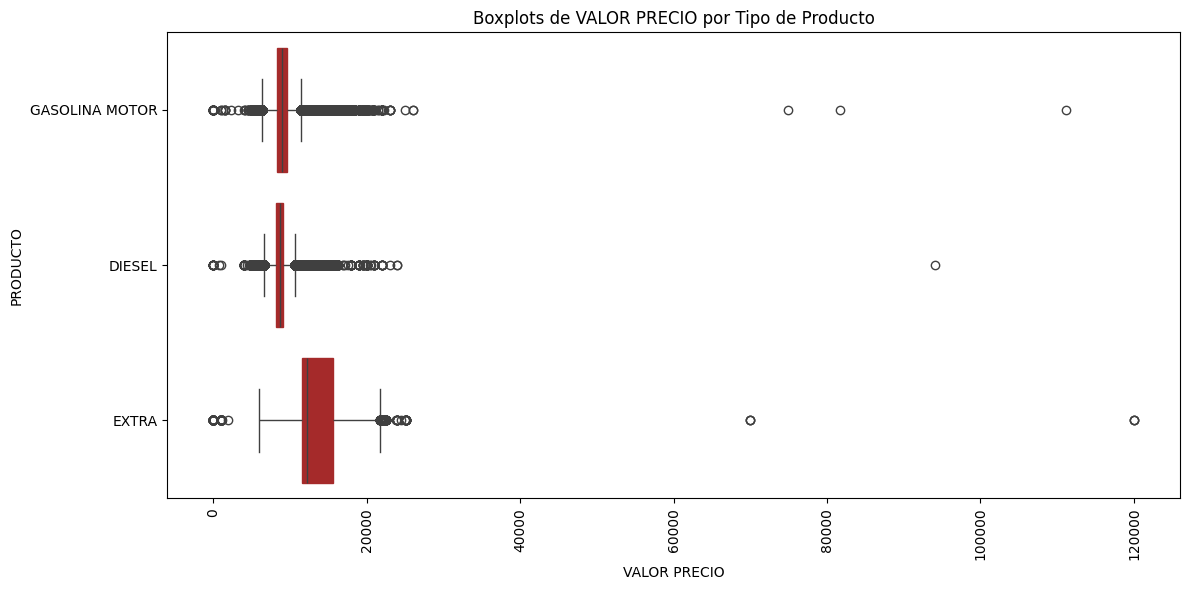

In [ ]:
# Crear el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='VALOR PRECIO', y='PRODUCTO', data=dfgas, palette="Blues", boxprops=dict(facecolor='blue', color='#A52A2A'))

# Ajustar el título y las etiquetas
plt.title("Boxplots de VALOR PRECIO por Tipo de Producto")
plt.xlabel("VALOR PRECIO")
plt.ylabel("PRODUCTO")

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustar los márgenes para que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()

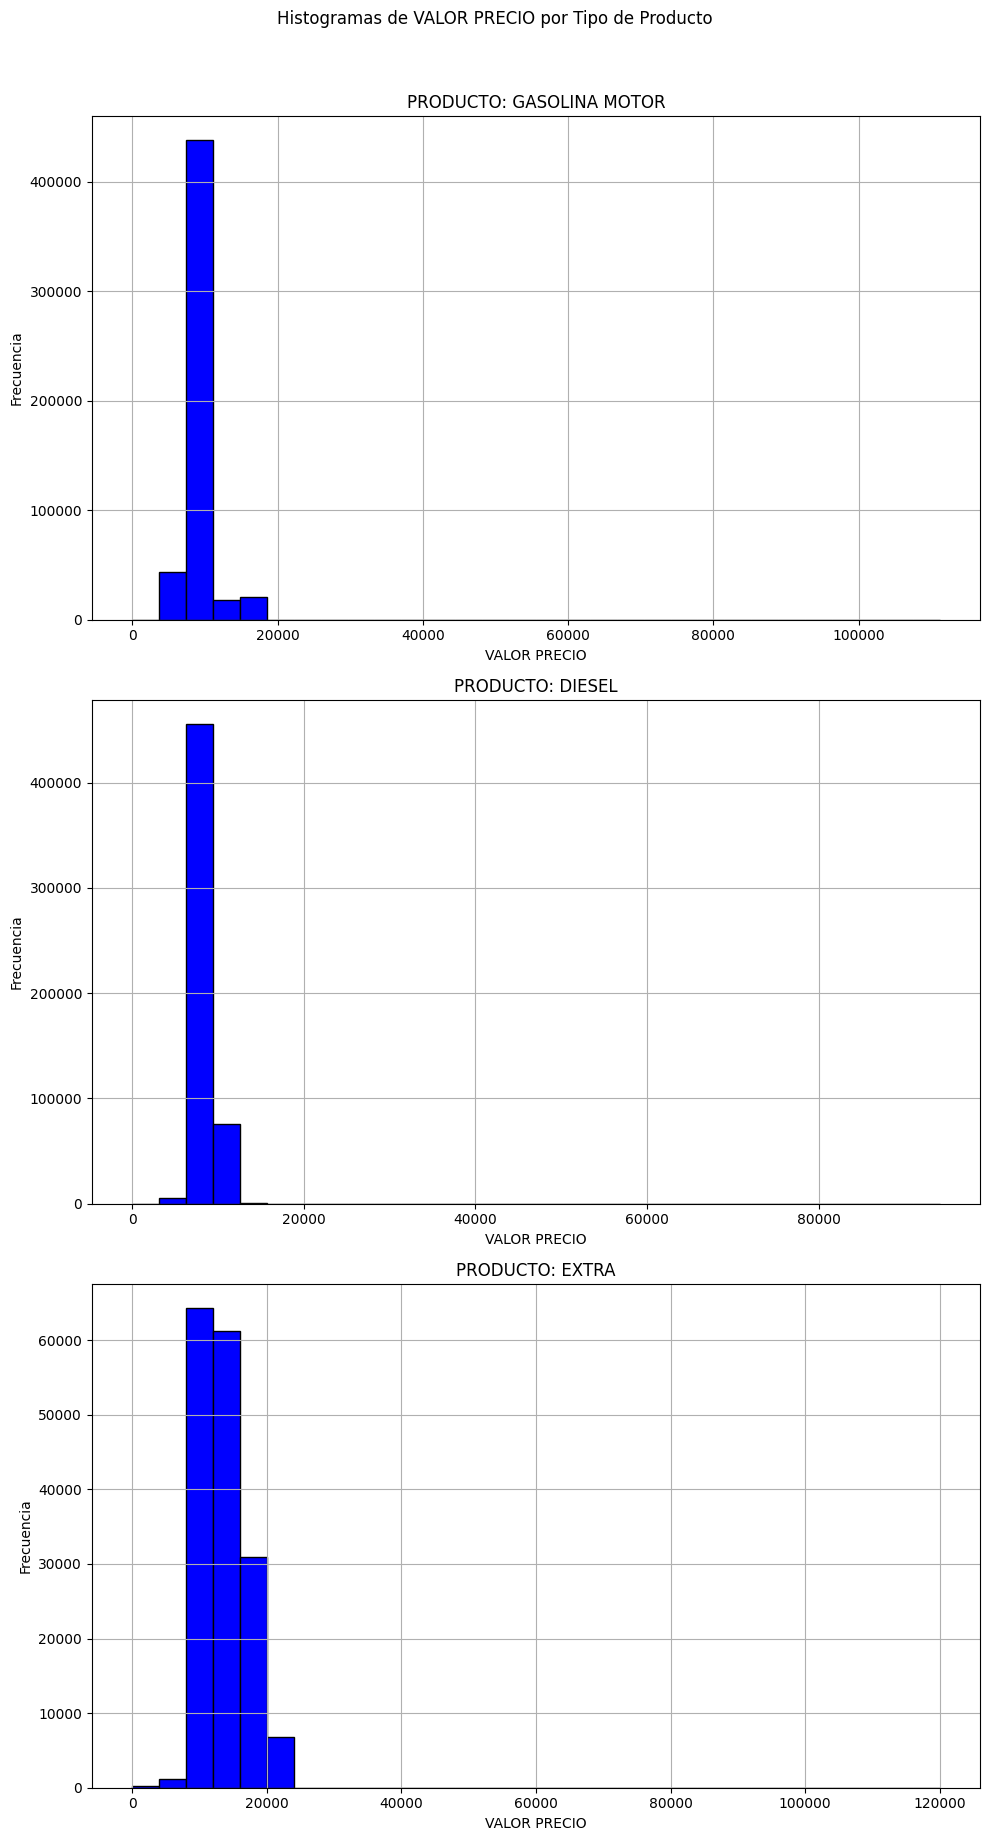

In [ ]:
productos = dfgana['PRODUCTO'].unique()

# Configurar la figura y los ejes
fig, axes = plt.subplots(nrows=len(productos), ncols=1, figsize=(10, 6 * len(productos)))
fig.suptitle("Histogramas de VALOR PRECIO por Tipo de Producto", y=1.02)

# Crear un histograma para cada tipo de producto
for i, producto in enumerate(productos):
    ax = axes[i] if len(productos) > 1 else axes
    data = dfgana[dfgana['PRODUCTO'] == producto]['VALOR PRECIO']
    ax.hist(data, bins=30, color='blue', edgecolor='black')
    ax.set_title(f'PRODUCTO: {producto}')
    ax.set_xlabel('VALOR PRECIO')
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Análisis por producto:

- **Diesel:** La distribución de precios para el Diesel parece ser más normal en comparación con los otros dos productos, con una menor concentración de precios en un rango específico.

- **Extra:** La distribución de precios para el producto Extra es similar a la del Diesel, aunque con una ligera tendencia a tener precios ligeramente más altos.

- **Gasolina Motor:** La distribución de precios para la Gasolina Motor es la más dispersa de las tres, con una mayor concentración de precios bajos y un pico muy pronunciado en un valor de precio específico.

<ipython-input-6-c59ca9a3217e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bandera_counts.index, y=bandera_counts.values, palette="Oranges")


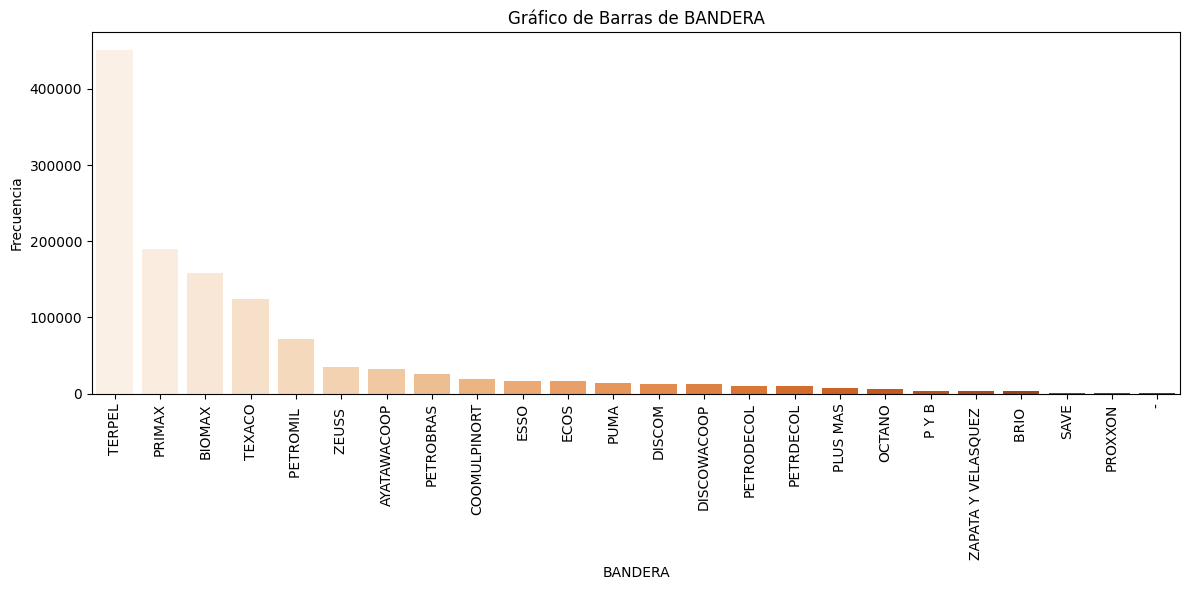

In [ ]:
bandera_counts = dfgas['BANDERA'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=bandera_counts.index, y=bandera_counts.values, palette="Oranges")
plt.title("Distribucion de BANDERA")
plt.xlabel("BANDERA")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

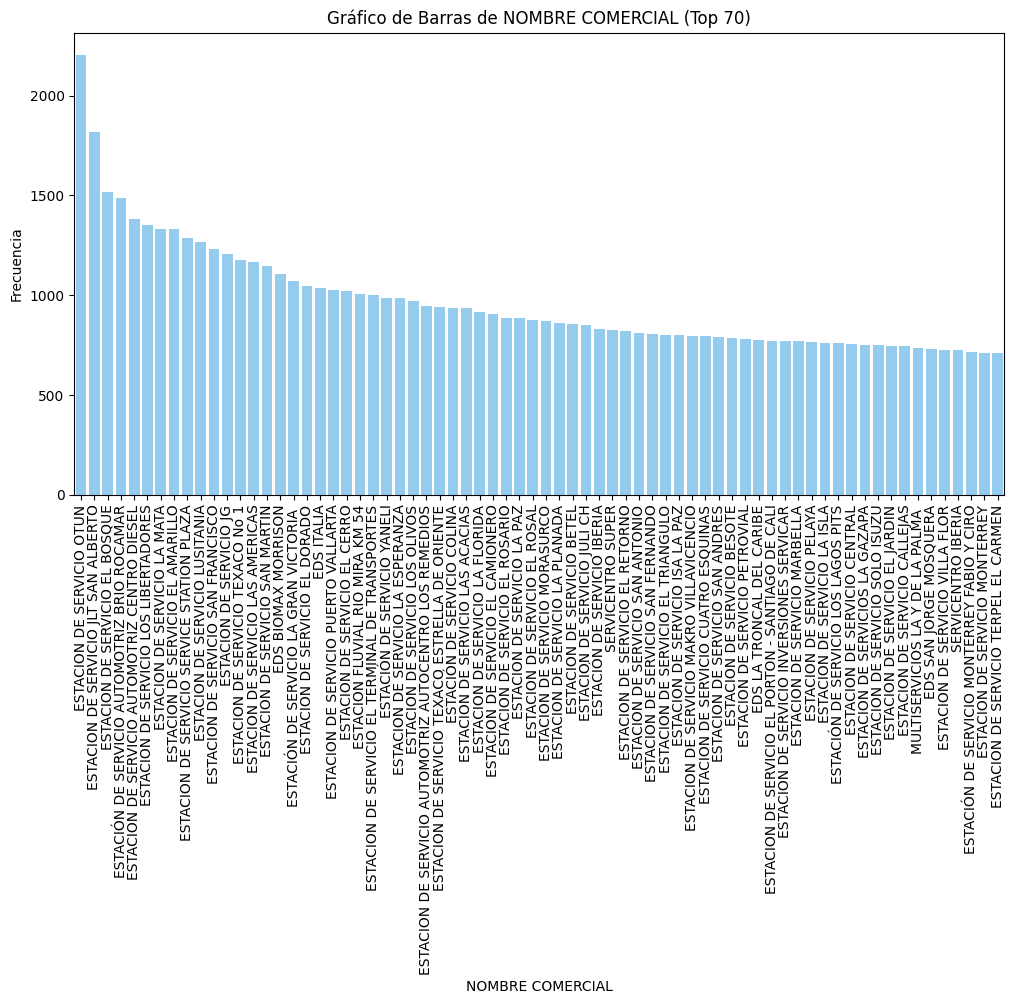

In [ ]:
nombre_comercial_counts = dfgas['NOMBRE COMERCIAL'].value_counts().head(70)

plt.figure(figsize=(12, 6))
sns.barplot(x=nombre_comercial_counts.index, y=nombre_comercial_counts.values, color="lightskyblue")
plt.title("Distribucion de NOMBRE COMERCIAL (Top 70)")
plt.xlabel("NOMBRE COMERCIAL")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

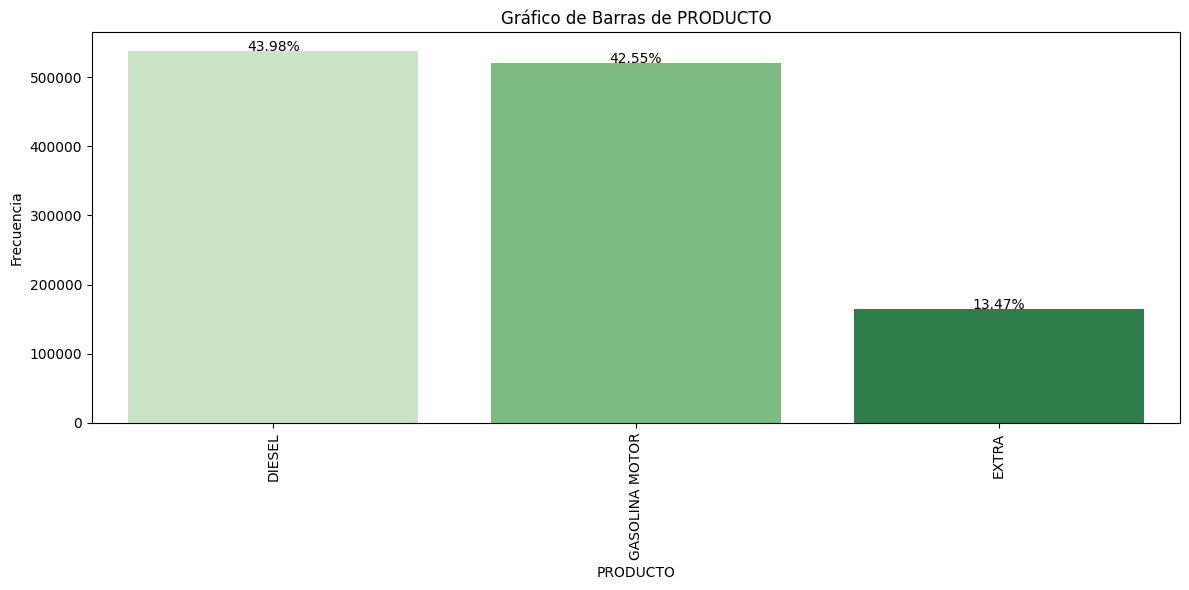

In [ ]:
producto_counts = dfgas['PRODUCTO'].value_counts()
producto_proportions = dfgas['PRODUCTO'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=producto_counts.index, y=producto_counts.values, palette="Greens")

plt.title("Distribucion de PRODUCTO")
plt.xlabel("PRODUCTO")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.tight_layout()

# Añadir las proporciones arriba de las barras
for i, p in enumerate(ax.patches):
    height = p.get_height()
    proportion = producto_proportions[i]
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{proportion:.2%}', ha="center")

plt.show()

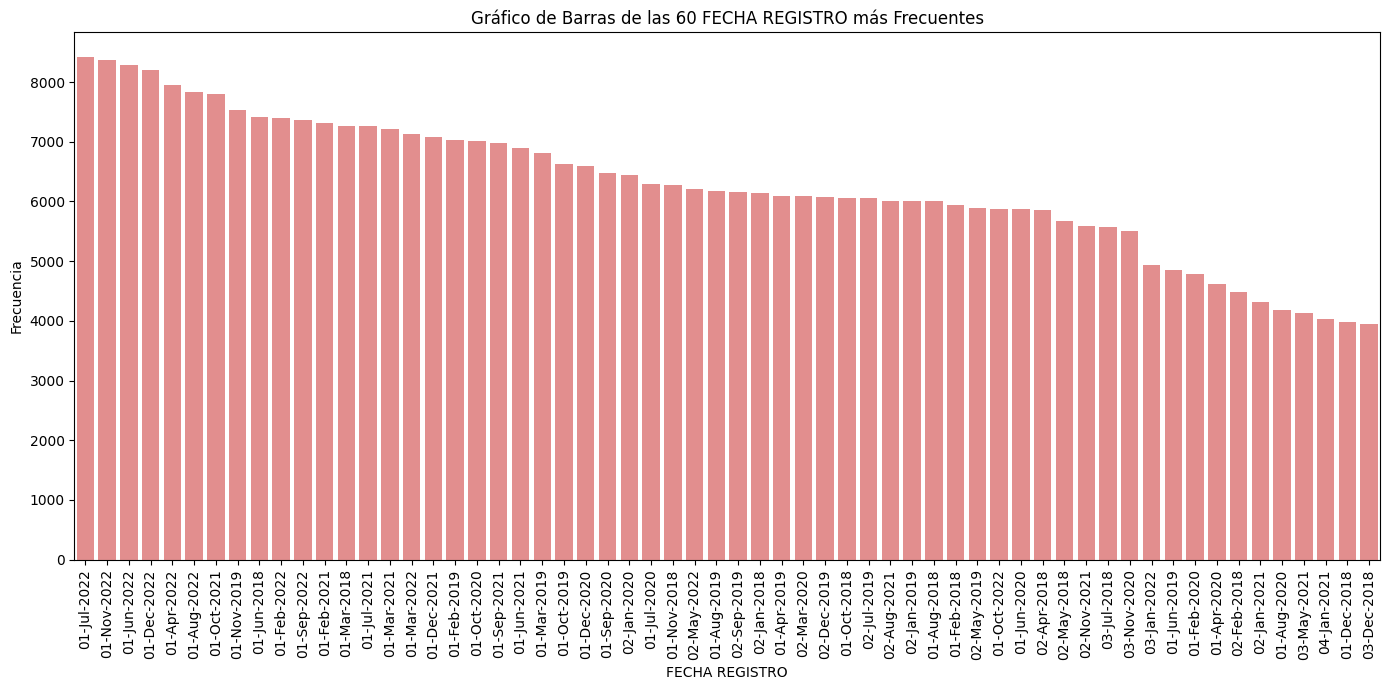

In [ ]:
fecha_registro_counts = dfgas['FECHA REGISTRO'].value_counts()

# Seleccionar solo los primeros 60 valores más frecuentes
top_60_counts = fecha_registro_counts.head(60)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_60_counts.index, y=top_60_counts.values, color="lightcoral")
plt.title("60 FECHA REGISTRO más Frecuentes (Top 60)")
plt.xlabel("FECHA REGISTRO")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
dfgas['DEPARTAMENTO'] = dfgas['DEPARTAMENTO'].replace(
    'ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y PROVIDENCIA',
    'ARCHIPIELAGO DE SAN ANDRES'
)

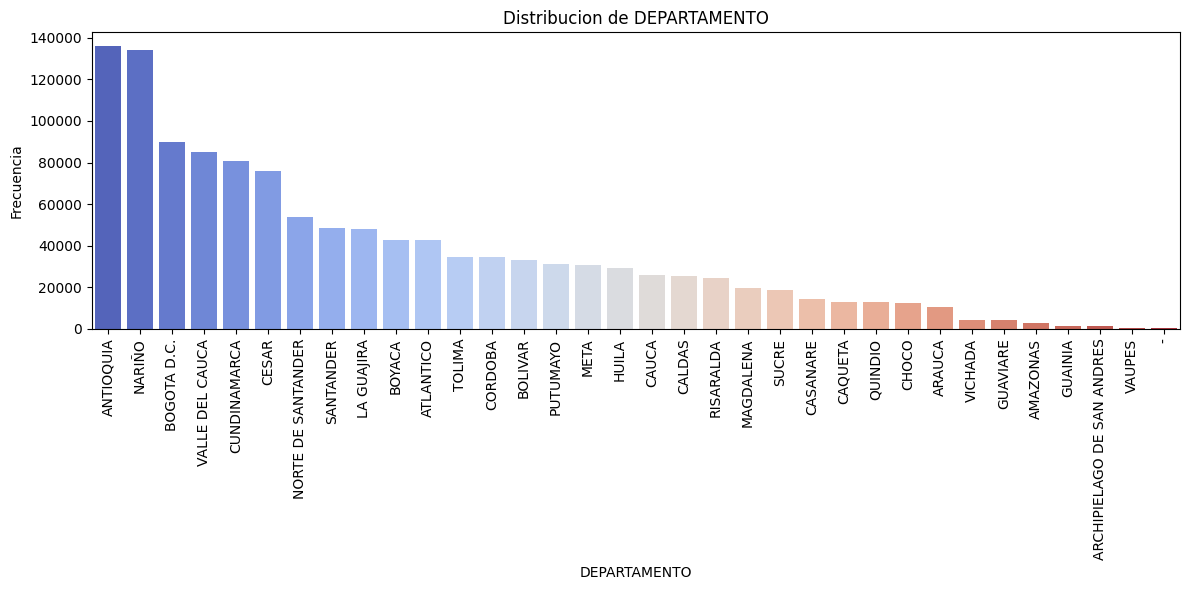

In [ ]:
departamento_counts = dfgas['DEPARTAMENTO'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=departamento_counts.index, y=departamento_counts.values, palette="coolwarm")
plt.title("Distribucion de DEPARTAMENTO")
plt.xlabel("DEPARTAMENTO")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

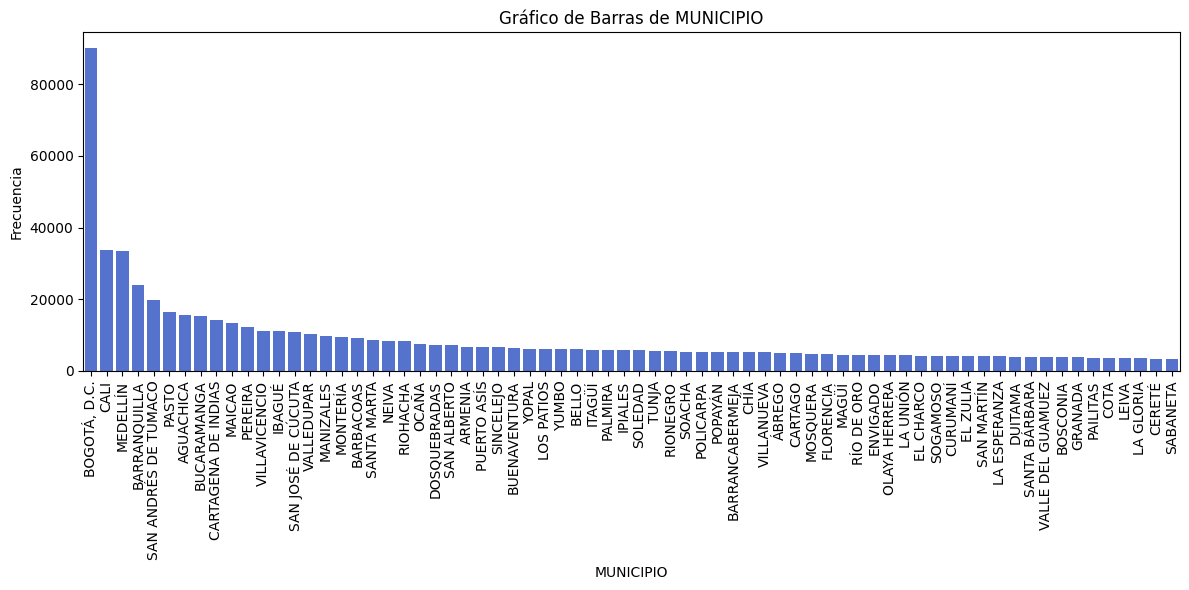

In [ ]:
municipioc = dfgas['MUNICIPIO'].value_counts()
top_70 = municipioc.head(70)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_70.index, y=top_70.values, color="royalblue")
plt.title("Distribucion de MUNICIPIO (Top 70)")
plt.xlabel("MUNICIPIO")
plt.ylabel("Frecuencia")

# Ajustar las etiquetas del eje x para que sean legibles
plt.xticks(ticks=range(len(top_70.index)),
           labels=[label if i % max(1, len(top_70.index)//40) == 0 else ''
                   for i, label in enumerate(top_70.index)],
           rotation=90)
plt.tight_layout()
plt.show()

## Valores Faltates (NA'S)

In [ ]:
valores_faltantes = dfgas.isna().sum()

valores_faltantes_df = valores_faltantes[valores_faltantes > 0].reset_index()
valores_faltantes_df.columns = ['variable', 'n_faltantes']

print("Valores faltantes por variable:")
print(valores_faltantes_df)

print("\nSuma de valores faltantes por columna:")
print(valores_faltantes)


Valores faltantes por variable:
           variable  n_faltantes
0  NOMBRE COMERCIAL          177

Suma de valores faltantes por columna:
BANDERA               0
NOMBRE COMERCIAL    177
PRODUCTO              0
FECHA REGISTRO        0
DEPARTAMENTO          0
MUNICIPIO             0
VALOR PRECIO          0
dtype: int64


## Valores faltantes:

- Se presencia valores NA's en la base de datos pero muy pocos a comparacion de los datos que tenemos.

Con respecto a esto, realizaremos lo siguiente:
Eliminaremos esos (NA'S) valores faltantes en la base de datos, ya que observamos en el summary la presencia de ellos pero en siendo muy poco y casi no impacta en el análisis.

In [ ]:
dfgana = dfgas[dfgas['NOMBRE COMERCIAL'].notna()]

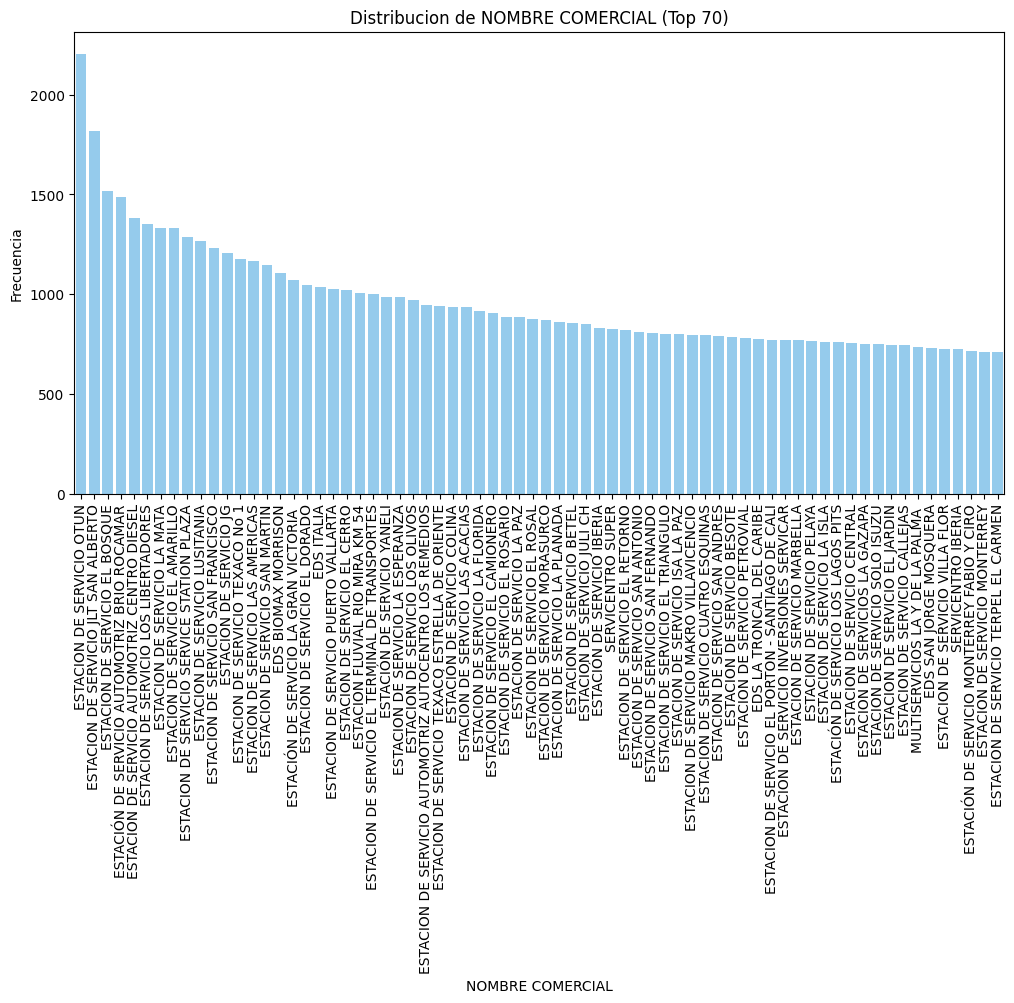

In [ ]:
nombre_comercial_counts = dfgas['NOMBRE COMERCIAL'].value_counts().head(70)

plt.figure(figsize=(12, 6))
sns.barplot(x=nombre_comercial_counts.index, y=nombre_comercial_counts.values, color="lightskyblue")
plt.title("Distribucion de NOMBRE COMERCIAL (Top 70)")
plt.xlabel("NOMBRE COMERCIAL")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
missing_values = dfgana.isna().sum()
print(missing_values)


BANDERA             0
NOMBRE COMERCIAL    0
PRODUCTO            0
FECHA REGISTRO      0
DEPARTAMENTO        0
MUNICIPIO           0
VALOR PRECIO        0
dtype: int64


### Luego de inputacion
Como observamos en estos tres histogramas, no se presentó ningún cambio significativo en la distribución de la gráfica.

## Mapa geografico
Ahora analizaremos visualmente utilizando un mapa

adjuntaremos las cordenas de Colombia a continuacion para realizar el mapa geografico

In [ ]:
archivos = [
    "/content/COLOMBIA.dbf",
    "/content/COLOMBIA.prj",
    "/content/COLOMBIA.sbn",
    "/content/COLOMBIA.sbx",
    "/content/COLOMBIA.shp",
    "/content/COLOMBIA.shx",
    "/content/COLOMBIA.xml"
]

def read_shapefile(files):
    shapefile_path = files[4]
    gdf = gpd.read_file(shapefile_path)
    return gdf

def convert_to_text(gdf):
    return gdf.astype(str)
gdf = read_shapefile(archivos)
coorde_col = convert_to_text(gdf)
print(coorde_col.head())


  OBJECTID DPTO_CCDGO DPTO_NANO_   DPTO_CNMBR                     DPTO_CACTO  \
0        1         05       1886    ANTIOQUIA  Constitucion Politica de 1886   
1        2         08       1910    ATLANTICO                 Ley 21 de 1910   
2        3         11          0  BOGOTA D.C.                           None   
3        4         13       1886      BOLIVAR  Constitucion Politica de 1886   
4        5         15       1886       BOYACA  Constitucion Politica de 1886   

      DPTO_NAREA DPTO_CSMBL DPTO_NANO PAIS_PAIS_     SHAPE_Leng  \
0  63063325603.3          3      2005          1  21.1370351323   
1  3326730008.33          3      2005          2  2.46107725489   
2  1633209262.44          3      2005          3  3.73128848597   
3  26665590821.3          3      2005          4  15.7069798263   
4  23077053533.8          3      2005          5  15.2809683167   

       SHAPE_Area                                           geometry  
0   5.15578332204  POLYGON ((-76.40481 8.8570

In [ ]:
coorde_col

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,63063325603.3,3,2005,1,21.1370351323,5.15578332204,"POLYGON ((-76.40481 8.857077, -76.404399 8.856..."
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3326730008.33,3,2005,2,2.46107725489,0.274825156773,"POLYGON ((-74.82969 11.049923, -74.829369 11.0..."
2,3,11,0,BOGOTA D.C.,None,1633209262.44,3,2005,3,3.73128848597,0.1330445385,"POLYGON ((-74.07274 4.835652, -74.072172 4.835..."
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,26665590821.3,3,2005,4,15.7069798263,2.1910549752,"MULTIPOLYGON (((-75.249657 10.798037, -75.2492..."
4,5,15,1886,BOYACA,Constitucion Politica de 1886,23077053533.8,3,2005,5,15.2809683167,1.88331457547,"POLYGON ((-72.011294 7.009436, -72.010287 7.00..."
5,6,17,1905,CALDAS,11 de Abril de 1905,7415932692.9,3,2005,6,6.61419957509,0.60471222479,"POLYGON ((-74.671181 5.771274, -74.67112 5.771..."
6,7,18,1981,CAQUETA,Ley 78 del 29 de Diciembre de 1981,90076650375.9,3,2005,7,19.8509070156,7.31601693754,"POLYGON ((-74.910937 2.964453, -74.907681 2.96..."
7,8,19,1857,CAUCA,15 de junio de 1857,30643309692.5,3,2005,8,13.3520922653,2.48563254687,"POLYGON ((-76.458408 3.328573, -76.458194 3.32..."
8,9,20,1967,CESAR,Ley 25 21 de junio de 1967,22283670028.7,3,2005,9,12.597030549,1.83497840946,"POLYGON ((-73.459565 10.868782, -73.459053 10...."
9,10,23,1951,CORDOBA,Ley 9 del 18 de Diciembre de 1951,25041935532.1,3,2005,10,8.98275661402,2.05376040233,"POLYGON ((-75.922608 9.438921, -75.922089 9.43..."


In [ ]:
print(coorde_col.dtypes)


OBJECTID      object
DPTO_CCDGO    object
DPTO_NANO_    object
DPTO_CNMBR    object
DPTO_CACTO    object
DPTO_NAREA    object
DPTO_CSMBL    object
DPTO_NANO     object
PAIS_PAIS_    object
SHAPE_Leng    object
SHAPE_Area    object
geometry      object
dtype: object


In [ ]:
coorde_col['geometry'] = coorde_col['geometry'].apply(shapely.wkt.loads)

  OBJECTID DPTO_CCDGO DPTO_NANO_   DPTO_CNMBR                     DPTO_CACTO  \
0        1         05       1886    ANTIOQUIA  Constitucion Politica de 1886   
1        2         08       1910    ATLANTICO                 Ley 21 de 1910   
2        3         11          0  BOGOTA D.C.                           None   
3        4         13       1886      BOLIVAR  Constitucion Politica de 1886   
4        5         15       1886       BOYACA  Constitucion Politica de 1886   

      DPTO_NAREA DPTO_CSMBL DPTO_NANO PAIS_PAIS_     SHAPE_Leng  \
0  63063325603.3          3      2005          1  21.1370351323   
1  3326730008.33          3      2005          2  2.46107725489   
2  1633209262.44          3      2005          3  3.73128848597   
3  26665590821.3          3      2005          4  15.7069798263   
4  23077053533.8          3      2005          5  15.2809683167   

       SHAPE_Area                                           geometry  
0   5.15578332204  POLYGON ((-76.40481 8.8570

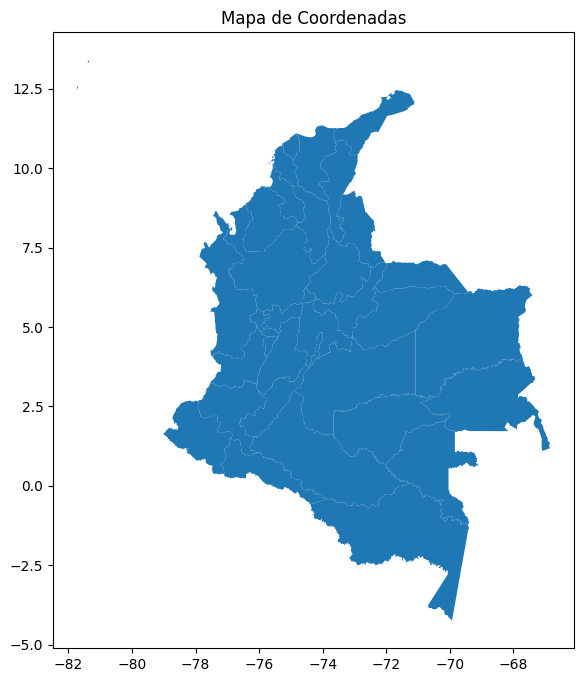

In [ ]:
coorde_col = gpd.GeoDataFrame(coorde_col, geometry='geometry')
print(coorde_col.head())

# GeoDataFrame
coorde_col.plot(figsize=(30, 8))
plt.title('Mapa de Coordenadas')
plt.show()



### Promediar VALOR PRECIO
Se promedia el valor de precio, que es donde se encuentra el precio de la gasolina, diésel y extra, para poder graficar en el mapa. Esto permite que el computador pueda trabajar de manera más eficiente, ya que de no hacerlo, el archivo sería demasiado pesado.

In [ ]:
resumdi = dfgas[dfgas['PRODUCTO'] == 'DIESEL']
resumdi = resumdi.groupby('DEPARTAMENTO').agg(precio=('VALOR PRECIO', 'mean')).reset_index()

print(resumdi)

                                         DEPARTAMENTO        precio
0                                                   -   8960.508475
1                                            AMAZONAS  10739.546520
2                                           ANTIOQUIA   9104.611797
3                                              ARAUCA   8332.387044
4   ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y P...  10098.152220
5                                           ATLANTICO   8629.519939
6                                         BOGOTA D.C.   8787.133941
7                                             BOLIVAR   8715.494540
8                                              BOYACA   8997.354240
9                                              CALDAS   8992.835982
10                                            CAQUETA   9360.575858
11                                           CASANARE   9057.601574
12                                              CAUCA   9231.144740
13                                              

In [ ]:
resumex = dfgas[dfgas['PRODUCTO'] == 'EXTRA']
resumex = resumex.groupby('DEPARTAMENTO').agg(precio=('VALOR PRECIO', 'mean')).reset_index()

print(resumex)

                                         DEPARTAMENTO        precio
0                                                   -  12618.474576
1                                           ANTIOQUIA  14503.660887
2   ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y P...  16314.327869
3                                           ATLANTICO  13838.961378
4                                         BOGOTA D.C.  14161.569963
5                                             BOLIVAR  13413.712738
6                                              BOYACA  14389.985791
7                                              CALDAS  13761.166667
8                                             CAQUETA  13454.787826
9                                            CASANARE  13113.273810
10                                              CAUCA  14083.940693
11                                              CESAR  11307.380084
12                                              CHOCO  13058.834694
13                                            CO

In [ ]:
resumgas = dfgas[dfgas['PRODUCTO'] == 'GASOLINA MOTOR']
resumgas = resumgas.groupby('DEPARTAMENTO').agg(precio=('VALOR PRECIO', 'mean')).reset_index()

print(resumgas)

                                         DEPARTAMENTO        precio
0                                                   -   9084.576271
1                                            AMAZONAS  11947.114990
2                                           ANTIOQUIA  10189.319477
3                                              ARAUCA   9438.239853
4   ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y P...  11786.933735
5                                           ATLANTICO   9773.188153
6                                         BOGOTA D.C.   9522.971109
7                                             BOLIVAR   9525.704189
8                                              BOYACA  10137.745331
9                                              CALDAS  10173.719890
10                                            CAQUETA  10013.720439
11                                           CASANARE   9869.776054
12                                              CAUCA   9802.173038
13                                              

### Usaremos Diesel
Usaremos este tipo de producto, ya que toma los 33 departamentos que nos proporciona el DataFrame de coordenadas, asegurando que todos los departamentos tengan un resultado. Además, es el producto con más datos disponibles.

In [ ]:
munic_2 = coorde_col['DPTO_CNMBR']
munic_2

,DPTO_CNMBR
0,ANTIOQUIA
1,ATLANTICO
2,BOGOTA D.C.
3,BOLIVAR
4,BOYACA
5,CALDAS
6,CAQUETA
7,CAUCA
8,CESAR
9,CORDOBA


In [ ]:
munic_1 = resumdi['DEPARTAMENTO']
munic_1

,DEPARTAMENTO
0,-
1,AMAZONAS
2,ANTIOQUIA
3,ARAUCA
4,"ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y P..."
5,ATLANTICO
6,BOGOTA D.C.
7,BOLIVAR
8,BOYACA
9,CALDAS


Observamos a primera vista un error en la escritura con respecto a "NARIÑO" en dfgas y en los datos de coordenadas aparece como "NARI?O". Dado que existen errores de este tipo, procederemos a corregirlos.

### Errores de escritura
aca corregiremos los errores que tengan las bases de datos por algun caracter.

In [ ]:
mal_car = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü', '?']  # Caracteres que queremos cambiar
bien_car = ['a', 'e', 'i', 'o', 'u', 'n', 'u', 'n'] # Caracteres por los que queremos cambiar

for j in range(len(mal_car)):  # Este for recorre cada elemento de cada municipio reemplazando los caracteres malos
    munic_1 = munic_1.str.replace(mal_car[j], bien_car[j]).str.lower() # Reemplazamos los caracteres
                                                                           # y los ponemos en minúscula
munic_1

,DEPARTAMENTO
0,-
1,amazonas
2,antioquia
3,arauca
4,"archipielago de san andres, santa catalina y p..."
5,atlantico
6,bogota d.c.
7,bolivar
8,boyaca
9,caldas


In [ ]:
mal_car = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü', '?']  # Caracteres que queremos cambiar
bien_car = ['a', 'e', 'i', 'o', 'u', 'n', 'u', 'n'] # Caracteres por los que queremos cambiar

for j in range(len(mal_car)): # Este for recorre cada elemento de cada municipio reemplazando los caracteres malos
    munic_2 = munic_2.str.replace(mal_car[j], bien_car[j]).str.lower() # Reemplazamos los caracteres
                                                                           # y los ponemos en minúscula
munic_2

,DPTO_CNMBR
0,antioquia
1,atlantico
2,bogota d.c.
3,bolivar
4,boyaca
5,caldas
6,caqueta
7,cauca
8,cesar
9,cordoba


### Datos que no estan en ambos df


In [ ]:
def match(a, b):
  lista = []
  set_b = set(b)
  for i, elemento in enumerate(a):
    if elemento not in set_b:
      lista.append(i)
  return lista

In [ ]:
a1 = match(list(set(munic_1.tolist())), munic_2.tolist())
a2 = match(munic_2.tolist(), list(set(munic_1.tolist())))

print("Posiciones en munic_1 que no están en munic_2:", a1)
print("Posiciones en munic_2 que no están en munic_1:", a2)

Posiciones en munic_1 que no están en munic_2: [26, 28]
Posiciones en munic_2 que no están en munic_1: [32]


In [ ]:
munic_1[a1]

,DEPARTAMENTO
26,quindio
28,santander


In [ ]:
munic_2[a2]

,DPTO_CNMBR
32,archipielago de san andres


**Eliminares todos los '-' que tenga la variable departamentos**

In [ ]:
resumdi = resumdi[resumdi['DEPARTAMENTO'] != '-']

# Verificar los resultados
print(resumdi['DEPARTAMENTO'].unique())

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA'
 'ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y PROVIDENCIA' 'ATLANTICO'
 'BOGOTA D.C.' 'BOLIVAR' 'BOYACA' 'CALDAS' 'CAQUETA' 'CASANARE' 'CAUCA'
 'CESAR' 'CHOCO' 'CORDOBA' 'CUNDINAMARCA' 'GUAINIA' 'GUAVIARE' 'HUILA'
 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER' 'PUTUMAYO'
 'QUINDIO' 'RISARALDA' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA'
 'VAUPES' 'VICHADA']


**Remplazamos los nombres que tengan errores de escritura**

In [ ]:
munic_1.replace({'bogota d.c.': 'bogota d.c.',
                 'archipielago de san andres': 'archipielago de san andres',
                 'atlantico': 'atlantico',
                 'meta': 'meta',
                 'quindio': 'quindio',
                 'narino': 'narino'
}, inplace=True)


print(munic_1[a1])
print(munic_2[a2])

26      quindio
28    santander
Name: DEPARTAMENTO, dtype: object
32    archipielago de san andres
Name: DPTO_CNMBR, dtype: object


In [ ]:
# Creamos el código de concatenación
resumdi["codigo"] = munic_1
coorde_col["codigo"] = munic_2

In [ ]:
# Concatenamos las bases de datos:
Datos_tot = pd.merge(coorde_col, resumdi , on ='codigo', how = 'outer')

# Verificamos si hay datos NA'S

In [ ]:
Datos_tot.columns

Index(['OBJECTID', 'DPTO_CCDGO', 'DPTO_NANO_', 'DPTO_CNMBR', 'DPTO_CACTO',
       'DPTO_NAREA', 'DPTO_CSMBL', 'DPTO_NANO', 'PAIS_PAIS_', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'codigo', 'DEPARTAMENTO', 'precio'],
      dtype='object')

In [ ]:
print(Datos_tot.columns)

Index(['OBJECTID', 'DPTO_CCDGO', 'DPTO_NANO_', 'DPTO_CNMBR', 'DPTO_CACTO',
       'DPTO_NAREA', 'DPTO_CSMBL', 'DPTO_NANO', 'PAIS_PAIS_', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'codigo', 'DEPARTAMENTO', 'precio'],
      dtype='object')


In [ ]:
missing_data = Datos_tot.isnull().sum()
print(missing_data)

OBJECTID        1
DPTO_CCDGO      1
DPTO_NANO_      1
DPTO_CNMBR      1
DPTO_CACTO      1
DPTO_NAREA      1
DPTO_CSMBL      1
DPTO_NANO       1
PAIS_PAIS_      1
SHAPE_Leng      1
SHAPE_Area      1
geometry        1
codigo          0
DEPARTAMENTO    1
precio          1
dtype: int64


No existen NAs, y anteriormente realizamos el análisis para verificar si había datos que no estuvieran en ambos conjuntos, y corregimos los errores ortográficos.

In [ ]:
coorde_col['precio'] = Datos_tot["precio"]
coorde_col

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry,codigo,precio
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,63063325603.3,3,2005,1,21.1370351323,5.15578332204,"POLYGON ((-76.40481 8.85708, -76.40440 8.85625...",antioquia,9104.611797
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3326730008.33,3,2005,2,2.46107725489,0.274825156773,"POLYGON ((-74.82969 11.04992, -74.82937 11.049...",atlantico,8629.519939
2,3,11,0,BOGOTA D.C.,None,1633209262.44,3,2005,3,3.73128848597,0.1330445385,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505...",bogota d.c.,8787.133941
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,26665590821.3,3,2005,4,15.7069798263,2.1910549752,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ...",bolivar,8715.494540
4,5,15,1886,BOYACA,Constitucion Politica de 1886,23077053533.8,3,2005,5,15.2809683167,1.88331457547,"POLYGON ((-72.01129 7.00944, -72.01029 7.00912...",boyaca,8997.354240
5,6,17,1905,CALDAS,11 de Abril de 1905,7415932692.9,3,2005,6,6.61419957509,0.60471222479,"POLYGON ((-74.67118 5.77127, -74.67112 5.77116...",caldas,8992.835982
6,7,18,1981,CAQUETA,Ley 78 del 29 de Diciembre de 1981,90076650375.9,3,2005,7,19.8509070156,7.31601693754,"POLYGON ((-74.91094 2.96445, -74.90768 2.96367...",caqueta,9360.575858
7,8,19,1857,CAUCA,15 de junio de 1857,30643309692.5,3,2005,8,13.3520922653,2.48563254687,"POLYGON ((-76.45841 3.32857, -76.45819 3.32857...",cauca,9231.144740
8,9,20,1967,CESAR,Ley 25 21 de junio de 1967,22283670028.7,3,2005,9,12.597030549,1.83497840946,"POLYGON ((-73.45956 10.86878, -73.45905 10.868...",cesar,7880.965762
9,10,23,1951,CORDOBA,Ley 9 del 18 de Diciembre de 1951,25041935532.1,3,2005,10,8.98275661402,2.05376040233,"POLYGON ((-75.92261 9.43892, -75.92209 9.43846...",cordoba,8950.497096


In [ ]:
print(Datos_tot.columns)


Index(['OBJECTID', 'DPTO_CCDGO', 'DPTO_NANO_', 'DPTO_CNMBR', 'DPTO_CACTO',
       'DPTO_NAREA', 'DPTO_CSMBL', 'DPTO_NANO', 'PAIS_PAIS_', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'codigo', 'DEPARTAMENTO', 'precio'],
      dtype='object')


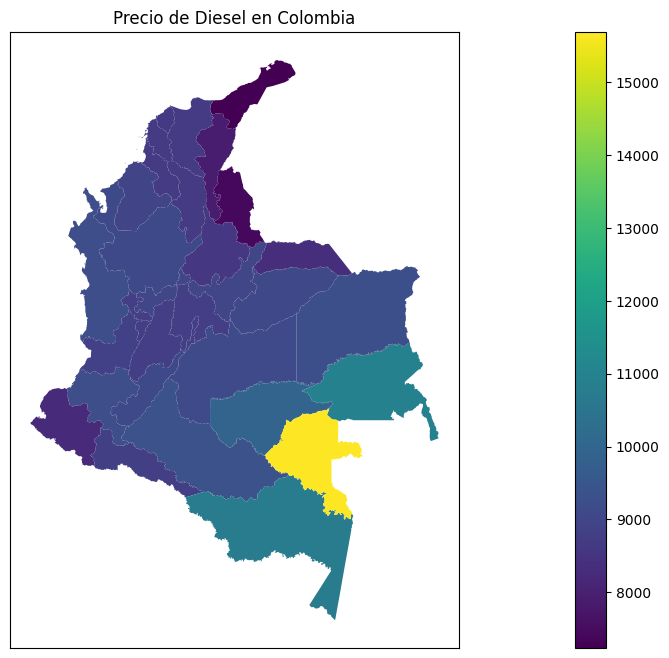

In [ ]:
coorde_col.plot(column="precio",figsize=(30,8), legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Precio de Diesel en Colombia")
plt.show()

## Observación del mapa
Se reflejan los puntos donde el costo de la gasolina es más alto en Colombia. Además, se observa el costo alrededor de cada departamento, representado según el color que le corresponde.